# SMA ROC Portfolio

    1. The Security is above its 200-day moving average
    2. The Security closes with sma_roc > 0, buy.
    3. If the Security closes with sma_roc < 0, sell your long position.
    
    (For a Portfolio of securities.)

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

Yahoo finance cryptocurrencies:  
https://finance.yahoo.com/cryptocurrencies/

10 largest Crypto currencies from 5 years ago:  
https://coinmarketcap.com/historical/20160626/   

10 largest Crypto currencies from 4 years ago:  
https://coinmarketcap.com/historical/20170625/

10 largest Crypto currencies from 3 years ago:  
https://coinmarketcap.com/historical/20180624/

10 largest Crypto currencies from 2 years ago:  
https://coinmarketcap.com/historical/20190630/

Some global data

In [3]:
# Symbol Lists

BitCoin = ['BTC-USD']
CryptoCurrencies_2016 = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD',
                         'XEM-USD', 'DASH-USD', 'MAID-USD', 'LSK-USD', 'DOGE-USD']
# 'DAO-USD' is a dead coin, so missing from above


CryptoCurrencies_2017 = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'ETC-USD',
                         'XEM-USD', 'MIOTA-USD', 'DASH-USD', 'BTS-USD']
# 'STRAT-USD' last trade date is 2020-11-18, so removed


CryptoCurrencies_2018 = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'BCH-USD', 'EOS-USD',
                         'LTC-USD', 'XLM-USD', 'ADA-USD', 'TRX-USD', 'MIOTA-USD']

CryptoCurrencies_2019 = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'BCH-USD',
                         'EOS-USD', 'BNB-USD', 'USDT-USD', 'BSV-USD', 'CRO-USD']


Stocks_Bonds_Gold_Crypto = ['SPY', 'QQQ', 'TLT', 'GLD', 'BTC-USD']
# Set 'continuous_timeseries' : False (for mixed asset classes)


start_1900 = datetime.datetime(1900, 1, 1)
start_2016 = datetime.datetime(2016, 6, 26)
start_2017 = datetime.datetime(2017, 6, 25)
start_2018 = datetime.datetime(2018, 6, 24)
start_2019 = datetime.datetime(2019, 6, 30)


# Pick one of the above symbols and start pairs
symbols = CryptoCurrencies_2016
start = start_2016

capital = 10000
end = datetime.datetime.now()

In [4]:
# NOTE: Cryptocurrencies have 7 days a week timeseries.  You can test them with
# their entire timeseries by setting stock_market_calendar=False.  Alternatively,
# to trade with stock market calendar by setting stock_market_calendar=True.
# For mixed asset classes that include stocks or ETFs, you must set
# stock_market_calendar=True.

options = {
    'use_adj' : False,
    'use_cache' : True,
    'use_continuous_calendar' : False,
    'force_stock_market_calendar' : True,
    'stop_loss_pct' : 1.0,
    'margin' : 1,
    'lookback' : 1,
    'sma_timeperiod': 20,
    'sma_pct_band': 3,
    'use_regime_filter' : False,
    'use_vola_weight' : True
}

Run Strategy

In [5]:
s = strategy.Strategy(symbols, capital, start, end, options=options)
s.run()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


View log DataFrames: raw trade log, trade log, and daily balance

In [6]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2018-08-27,0,5.11,143,entry,LONG,LSK-USD
1,2018-08-30,1,0.00,323771,entry,LONG,DOGE-USD
2,2018-09-04,2,216.57,3,entry,LONG,DASH-USD
3,2018-09-13,3,0.25,4170,entry,LONG,MAID-USD
4,2018-09-17,4,0.23,4170,exit,LONG,MAID-USD


In [7]:
s.tlog.head()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
0,2018-08-27,5.11,2018-09-17,3.40,-1.72,-245.32,143,-245.32,LONG,LSK-USD
1,2018-08-30,0.00,2018-10-08,0.01,0.00,767.98,323771,522.66,LONG,DOGE-USD
2,2018-09-04,216.57,2018-10-02,182.24,-34.33,-102.98,3,419.68,LONG,DASH-USD
3,2018-09-13,0.25,2018-09-17,0.23,-0.02,-66.20,4170,353.47,LONG,MAID-USD
4,2018-09-18,0.24,2018-09-26,0.24,-0.00,-5.84,4081,347.63,LONG,MAID-USD


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2022-12-23,94211.30,94211.30,94211.30,6648,51807.57,1.00,-
2022-12-27,94114.29,94114.29,94114.29,6648,51807.57,1.00,-
2022-12-28,93234.95,93234.95,93234.95,6648,51807.57,1.00,-
2022-12-29,93322.91,93322.91,93322.91,254,65988.07,1.00,X
2022-12-30,93085.28,93085.28,93085.28,0,93085.28,1.00,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                 2018-08-27
end                                                   2022-12-30
beginning_balance                                          10000
ending_balance                                          93085.28
total_net_profit                                        83085.28
gross_profit                                           208509.87
gross_loss                                            -125424.58
profit_factor                                               1.66
return_on_initial_capital                                 830.85
annual_return_rate                                         67.16
trading_period                           4 years 4 months 3 days
pct_time_in_market                                         83.39
margin                                                         1
avg_leverage                                                1.00
max_leverage                                                1.00
min_leverage             

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
LTC-USD,"$4,372.04",0.11,0.05,0.47
MAID-USD,"-$3,744.67",0.11,-0.05,-0.41
BTC-USD,"-$5,916.07",0.11,-0.07,-0.64
DOGE-USD,"$84,052.48",0.11,1.01,9.10
XRP-USD,"$12,983.83",0.11,0.16,1.41
XEM-USD,$994.09,0.11,0.01,0.11
ETH-USD,"$9,517.20",0.11,0.11,1.03
DASH-USD,"-$8,024.11",0.11,-0.10,-0.87
LSK-USD,"-$11,149.51",0.11,-0.13,-1.21
TOTAL,"$83,085.28",1.00,1.00,1.00


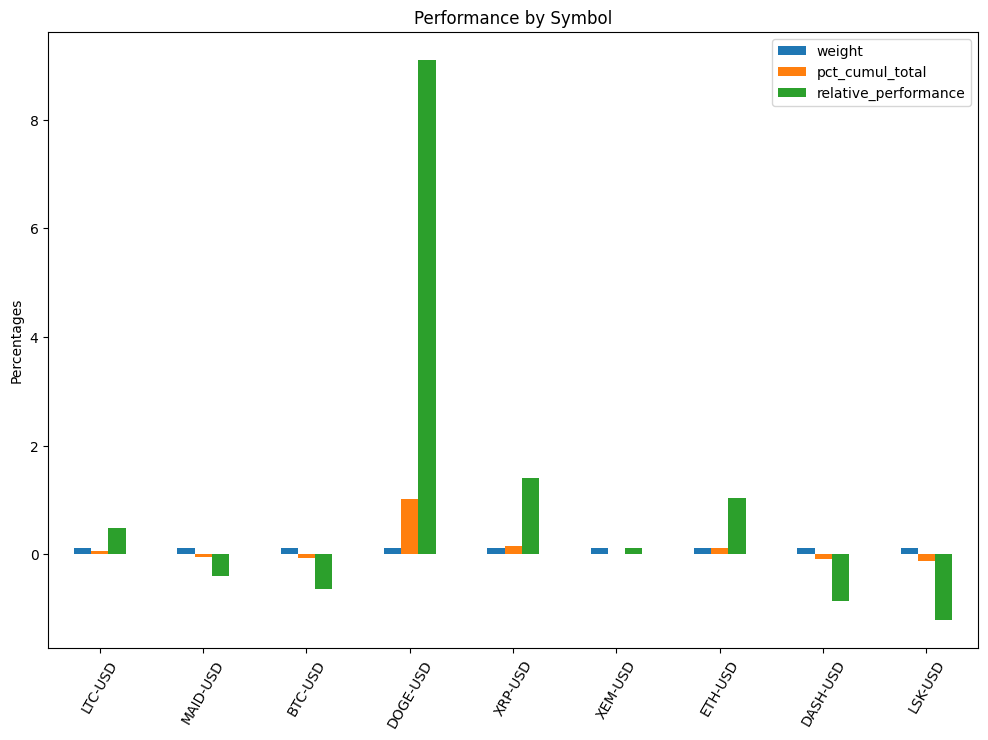

In [10]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,LTC-USD,MAID-USD,BTC-USD,DOGE-USD,XRP-USD,XEM-USD,ETH-USD,DASH-USD,LSK-USD
LTC-USD,1.00,0.49,0.81,0.48,0.66,0.64,0.83,0.74,0.67
MAID-USD,0.49,1.00,0.55,0.27,0.42,0.38,0.50,0.45,0.38
BTC-USD,0.81,0.55,1.00,0.46,0.58,0.61,0.83,0.70,0.63
DOGE-USD,0.48,0.27,0.46,1.00,0.40,0.38,0.46,0.39,0.39
XRP-USD,0.66,0.42,0.58,0.40,1.00,0.62,0.65,0.59,0.54
XEM-USD,0.64,0.38,0.61,0.38,0.62,1.00,0.64,0.61,0.63
ETH-USD,0.83,0.50,0.83,0.46,0.65,0.64,1.00,0.70,0.66
DASH-USD,0.74,0.45,0.70,0.39,0.59,0.61,0.70,1.00,0.66
LSK-USD,0.67,0.38,0.63,0.39,0.54,0.63,0.66,0.66,1.00


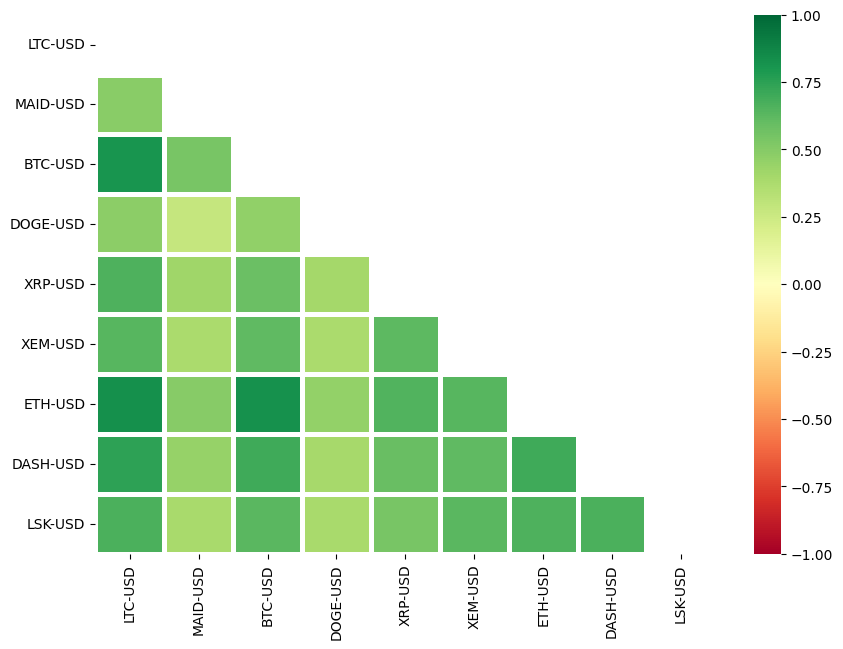

In [11]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark('BTC-USD', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

[*********************100%***********************]  1 of 1 completed


Plot Equity Curves: Strategy vs Benchmark

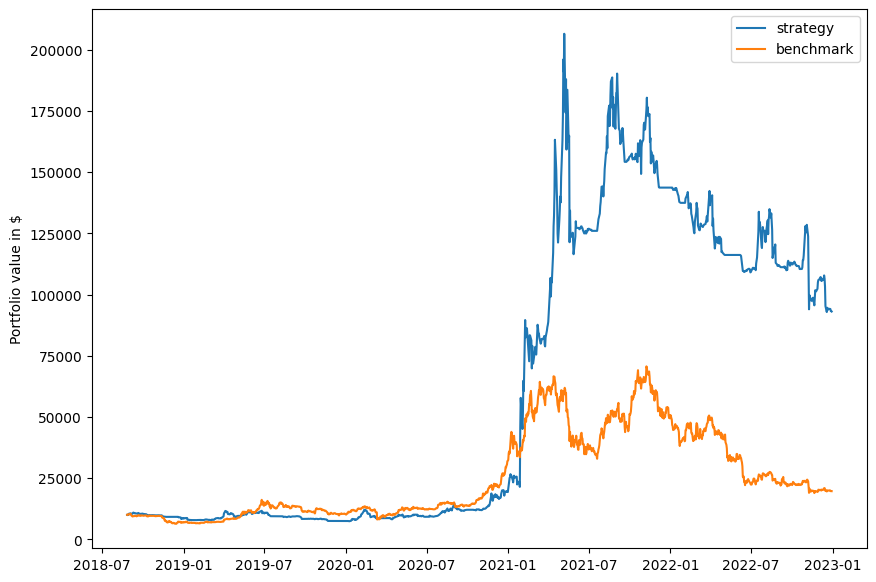

In [13]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,67.16,16.90
max_closed_out_drawdown,-55.04,-73.26
annualized_return_over_max_drawdown,1.22,0.23
best_month,271.57,65.49
worst_month,-38.40,-38.50
sharpe_ratio,0.95,0.47
sortino_ratio,1.61,0.61
monthly_std,32.32,15.08
annual_std,520.46,104.09


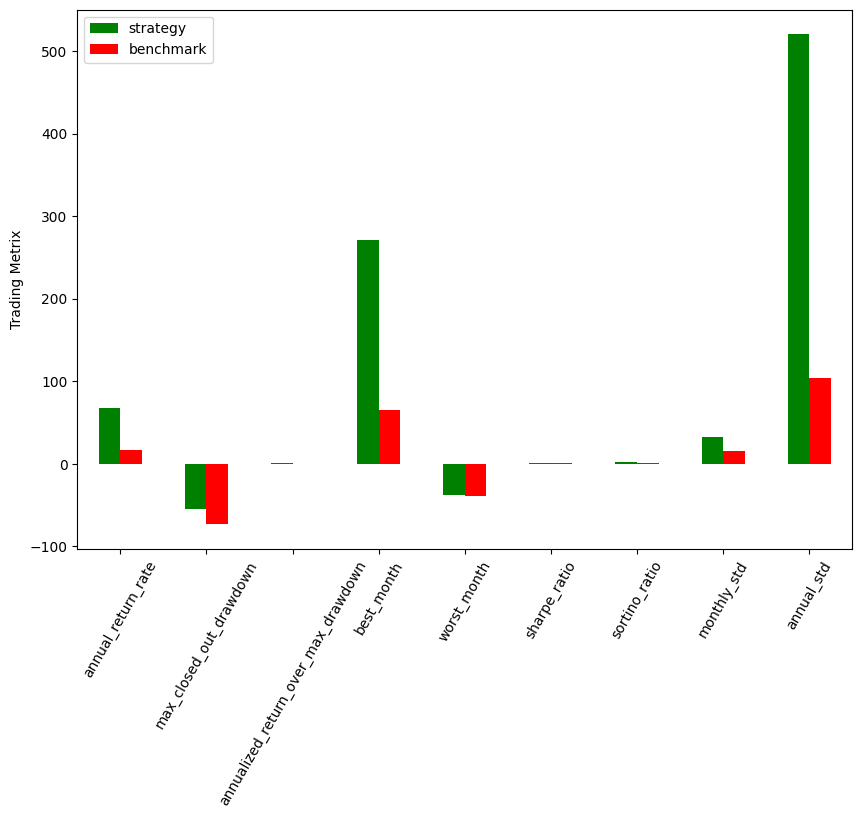

In [14]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [15]:
kelly = pf.kelly_criterion(s.stats, benchmark.stats)
kelly

sharpe_ratio            0.95
sharpe_ratio_max        1.06
sharpe_ratio_min        0.84
strategy risk           5.20
instrument risk         1.04
optimal target risk     0.95
half kelly criterion    0.47
aggressive leverage     0.91
moderate leverage       0.46
conservative leverage   0.40
dtype: float64